# Analisi serie dataset ISS Magneto



In [1]:
import pandas as pd
values = pd.read_csv('../data/magneto.csv', parse_dates=[1])
values.head()

,misura,data,latitudine,longitudine,altezza,angolo_sole,al_sole,mag_x,mag_y,mag_z
0,0,2020-04-11 04:30:10,-31.346194,23.793806,432304.87500,-2.138225,False,-5.726174,-0.969751,7.890812
1,1,2020-04-11 04:30:11,-31.301917,23.844417,432285.81250,-2.101173,False,-10.442575,-1.821763,13.973465
2,2,2020-04-11 04:30:12,-31.257639,23.894944,432266.71875,-2.064424,False,-13.659105,-2.523399,19.054619
3,3,2020-04-11 04:30:13,-31.213306,23.945444,432247.62500,-2.027931,False,-16.846289,-3.024730,23.010302
4,4,2020-04-11 04:30:14,-31.168972,23.995889,432228.53125,-1.991669,False,-19.414034,-3.465301,26.277033


Analizziamo i dati, ma prima capiamo cosa rappresenta la latitudine e la longitudine
![Latitudine e longitudine](../images/latitudine-longitudine.png "Latitudine e longitudine")



In [2]:
import numpy as np

cols = ["mag_x","mag_y","mag_z"]
magnetic = values[cols]
values["mag"] = magnetic.apply(lambda x: np.sqrt(x.dot(x)), axis=1)

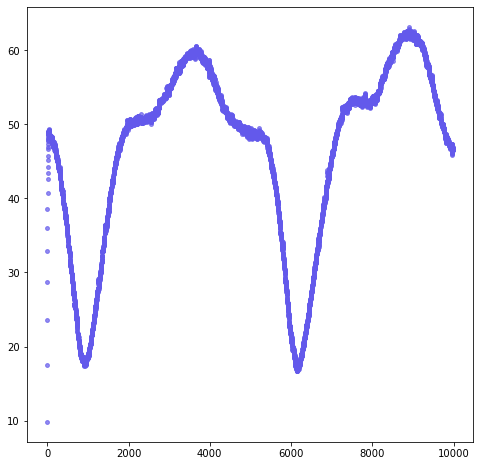

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(values["misura"], values["mag"], s=15,alpha=0.70,color="#6359EB")

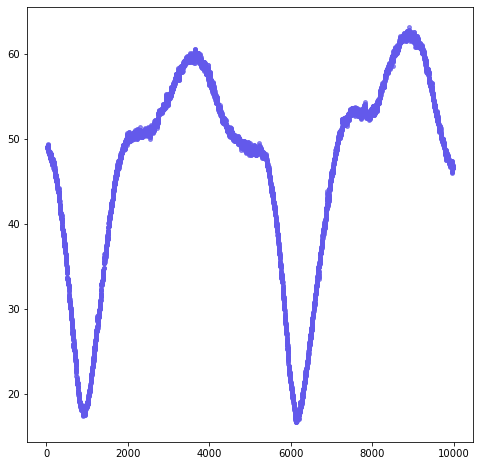

In [4]:
shiftValues = 25

valuesClean = values[shiftValues:]
plt.figure(figsize=(8,8))
plt.scatter(valuesClean["misura"], valuesClean["mag"], s=15,alpha=0.70,color="#6359EB")

In [5]:
valuesClean = valuesClean.set_index('data')
dates = pd.date_range(valuesClean.index.min(), valuesClean.index.max(),freq='1S')
valuesClean = valuesClean.reindex(dates)

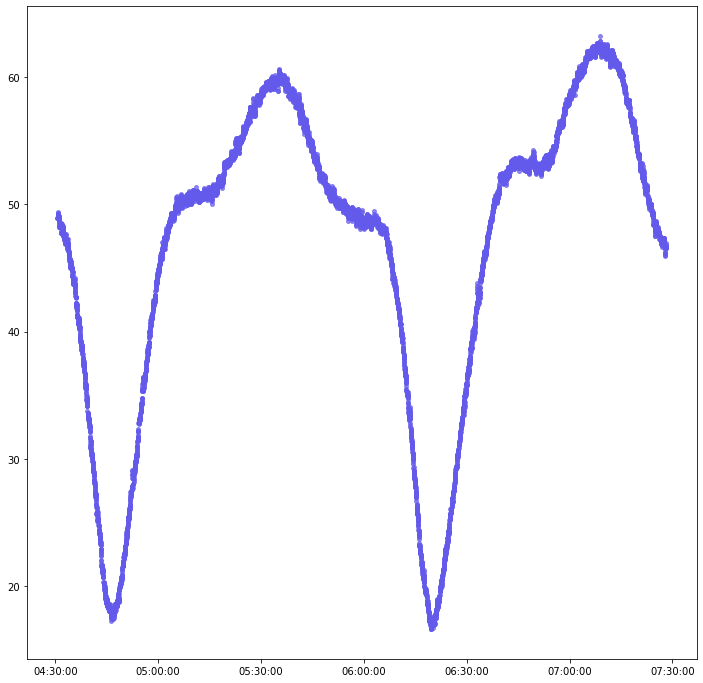

In [6]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(valuesClean.index, valuesClean["mag"], s=15,alpha=0.70,color="#6359EB")
date_form = DateFormatter("%H:%M:%S")
ax.xaxis.set_major_formatter(date_form)
plt.show()

Misuro il delta in minuti tra i due punti più bassi che considero la partenza per le nostre misure ma prima calcolo la media mobile dei valori

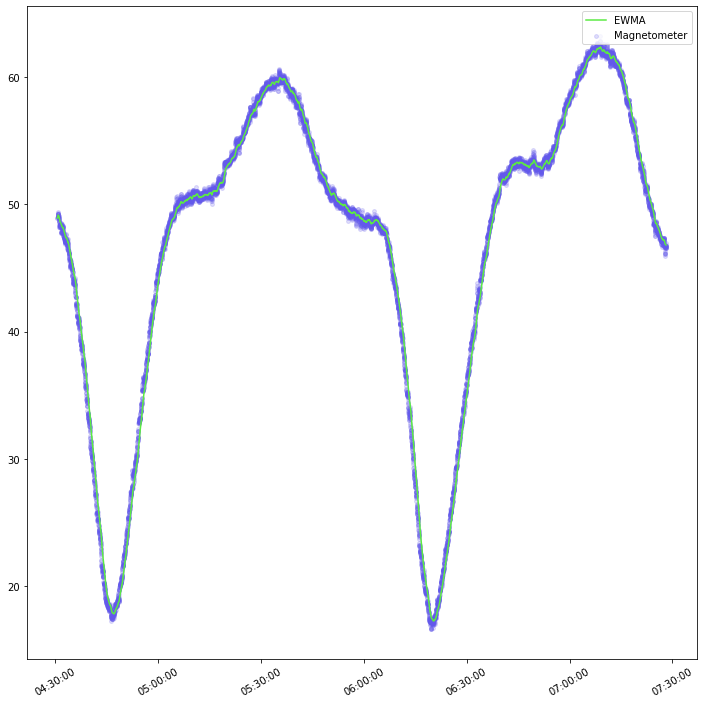

In [7]:
ewma = valuesClean.mag.ewm(span=60).mean()


fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(valuesClean.index, valuesClean["mag"], s=15,alpha=0.20,label="Magnetometer",color="#6359EB")
ax.plot(valuesClean.index,ewma,label='EWMA',color='#5BEB42')
date_form = DateFormatter("%H:%M:%S")
ax.xaxis.set_major_formatter(date_form)

plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()

valuesClean['ewma'] = ewma

In [8]:
valuesClean['datehour'] = valuesClean.index.hour
valuesClean.reset_index(inplace=True)
valuesClean.rename(columns={'index':'time'}, inplace=True)
valuesClean

,time,misura,latitudine,longitudine,altezza,angolo_sole,al_sole,mag_x,mag_y,mag_z,mag,ewma,datehour
0,2020-04-11 04:30:36,25.0,-30.187556,25.093000,431807.56250,-1.197881,False,-29.458424,-5.215073,38.700703,48.915643,48.915643,4
1,2020-04-11 04:30:37,26.0,-30.142694,25.142306,431788.40625,-1.160580,False,-29.572733,-5.345421,38.583103,48.905786,48.910632,4
2,2020-04-11 04:30:38,27.0,-30.097806,25.191556,431769.21875,-1.123100,False,-29.781294,-5.346735,38.545101,49.002427,48.942256,4
3,2020-04-11 04:30:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.942256,4
4,2020-04-11 04:30:40,28.0,-30.007972,25.289917,431730.87500,-1.047580,False,-29.732365,-5.345577,38.608608,49.022580,48.963875,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10650,2020-04-11 07:28:06,9983.0,-48.269306,-55.184500,439681.81250,-28.230949,False,-26.890598,-8.938740,37.187557,46.753821,46.815383,7
10651,2020-04-11 07:28:07,9984.0,-48.246028,-55.098556,439672.21875,-28.182815,False,-26.866863,-8.964282,37.144955,46.711180,46.811751,7
10652,2020-04-11 07:28:08,9985.0,-48.222667,-55.012667,439662.59375,-28.134664,False,-26.803841,-9.086942,37.158066,46.709102,46.808180,7
10653,2020-04-11 07:28:09,9986.0,-48.199278,-54.926861,439652.90625,-28.086496,False,-26.688271,-9.056161,37.091957,46.584237,46.800405,7


In [23]:
import datetime

filterMag = valuesClean["ewma"] < 20
minimum = valuesClean[filterMag].groupby('datehour')['ewma'].min()

date = []
for index, value in minimum.items():
    filterData = valuesClean["datehour"] == index
    filterValue = valuesClean["ewma"] == value
    
    dataRow = valuesClean[filterData & filterValue].iloc[0]
    date.append(dataRow['time'])

dateDiff = (date[1] - date[0]).seconds

minutes, seconds = divmod(dateDiff, 60)
print("Il periodo orbitale della ISS è di {0} minuti e {1} secondi per un totale di {2} misure per orbita".format(minutes, seconds,dateDiff))

Il periodo orbitale della ISS è di 93 minuti e 15 secondi per un totale di 5595 misure per orbita


In [24]:
date.insert(0, valuesClean.time.min())
date.insert(3, valuesClean.time.max())

[Timestamp('2020-04-11 04:30:36'),
 Timestamp('2020-04-11 04:47:07'),
 Timestamp('2020-04-11 06:20:22')]

In [26]:
orbitTime = []
for val in zip(date[:-1],date[1:]):
    orbitTime.append(val)

In [40]:
valuesClean['orbit'] = 0
valuesClean['orbitMeasure'] = 0

for i, row in valuesClean.iterrows():
    measureTime = row['time']
    for index,orbit in enumerate(orbitTime):
        start, end = orbit
        
        if start <= measureTime <= end:
            valuesClean.at[i,'orbit'] = index

val0 = date[1]



valuesClean['orbitMeasure'] = np.mod((valuesClean['time'] - val0) /np.timedelta64(1,'s'),dateDiff)

In [44]:
valuesClean['mag'].fillna(valuesClean['ewma'], inplace=True)

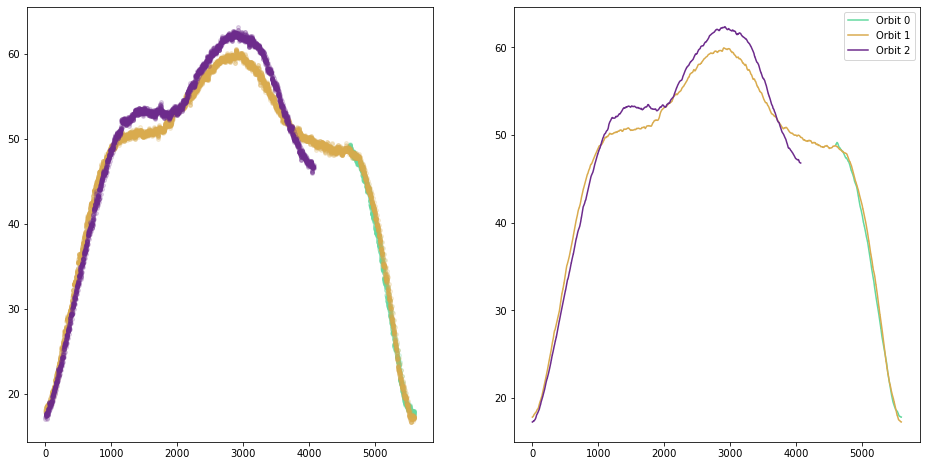

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 8))

colors = ['#64D9A0','#D9AB4E','#6D2B8C']

for orbit in range(3):
    label = "Orbit {0}".format(orbit)
    orbitData = valuesClean[valuesClean['orbit'] == orbit]
    ax1.scatter(orbitData.orbitMeasure, orbitData["mag"], s=15,alpha=0.20,label=label,color=colors[orbit])
    ax2.plot(orbitData.orbitMeasure,orbitData['ewma'],label=label,color=colors[orbit])
    

plt.legend(loc='upper right')
plt.show()   

Controllo l'effetto del sole sulla serie di valori

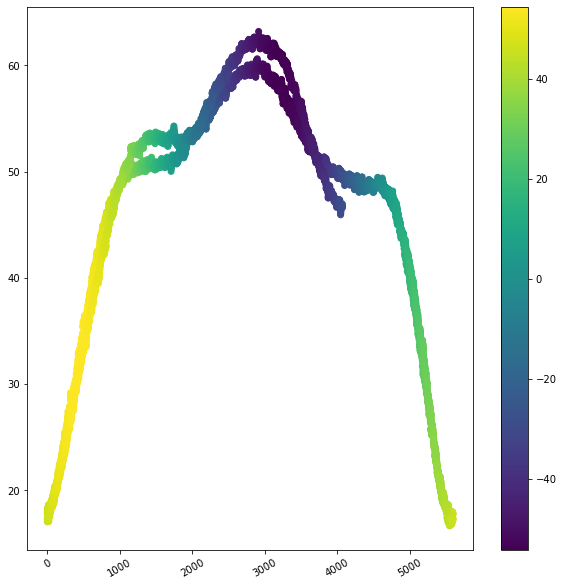

In [62]:
plt.figure(figsize=(10,10))
plt.scatter(valuesClean.orbitMeasure, valuesClean["mag"], c=valuesClean["angolo_sole"],cmap='viridis')
plt.colorbar()
plt.xticks(rotation=30)
plt.show()
